# Quantum Fourier Transform

La trasformata quantistica di Fourier permette di passare dalla base computazionale ($Z$) alla base di Fourier, e viceversa (tramite la trasformata inversa).

Definiamo l'operatore per la trasformata quantistica di Fourier nel seguente modo:

$$
U_{\mathrm{QFT}}
= \frac{1}{\sqrt{N}} 
  \sum_{j=0}^{N-1} \sum_{k=0}^{N-1}
  e^{\frac{2\pi i}{N} jk} \, |k\rangle\langle j|
$$

che diventa...

$$
U_{\mathrm{QFT}} \lvert x \rangle
= \frac{1}{\sqrt{N}}
\bigl( \lvert 0 \rangle + e^{\frac{2\pi i}{2^{1}} x} \lvert 1 \rangle \bigr)
\otimes
\bigl( \lvert 0 \rangle + e^{\frac{2\pi i}{2^{2}} x} \lvert 1 \rangle \bigr)
\otimes \cdots \otimes
\bigl( \lvert 0 \rangle + e^{\frac{2\pi i}{2^{n}} x} \lvert 1 \rangle \bigr)
$$

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector
from BoredQiskit import FastQiskit as fq
from BoredQiskit import FastUtilsGate as fg
import numpy as np

## Inizializzare un numero nella base di Fourier

Se il numero è noto a priori, usando la definizione, possiamo inizializzare il valore, con complessità $O(1)$.
$$
\lvert x \rangle \;\xrightarrow{\text{base di Fourier}}\; \lvert \tilde{x} \rangle = 
\frac{1}{\sqrt{N}} \sum_{k=0}^{N-1} e^{\frac{2\pi i}{N} k x} \lvert k \rangle
$$

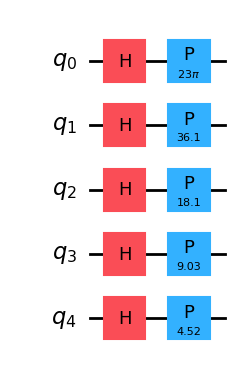

In [2]:
def QF_init(num, qubit_amount):
    """
    initialize `num` in a circuit in the Fourier basis, 
    with the specified `qubit_amount`.
    """
    if num > 2**qubit_amount:
        print("not enough qubits to represent", num, "in the circuit, at least", int(np.log2(num)+1), "qubits are needed")
        return QuantumCircuit(0)

    qc = QuantumCircuit(qubit_amount)
    qc.h(range(qubit_amount))
    for i in range(qubit_amount):
        theta = np.pi*num/(2**i)
        qc.p(theta, i)
    return qc

qc = QF_init(23,5)

qc.draw('mpl')

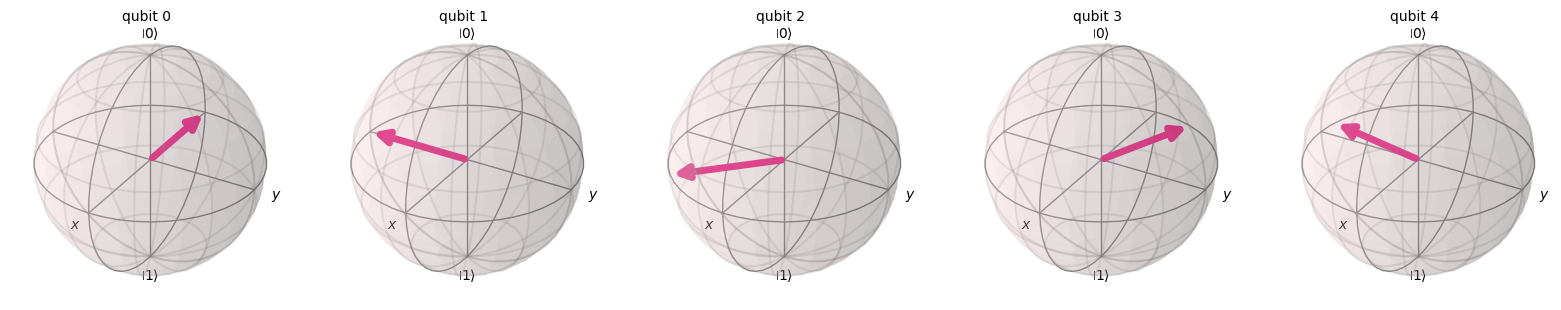

In [3]:
plot_bloch_multivector(qc)

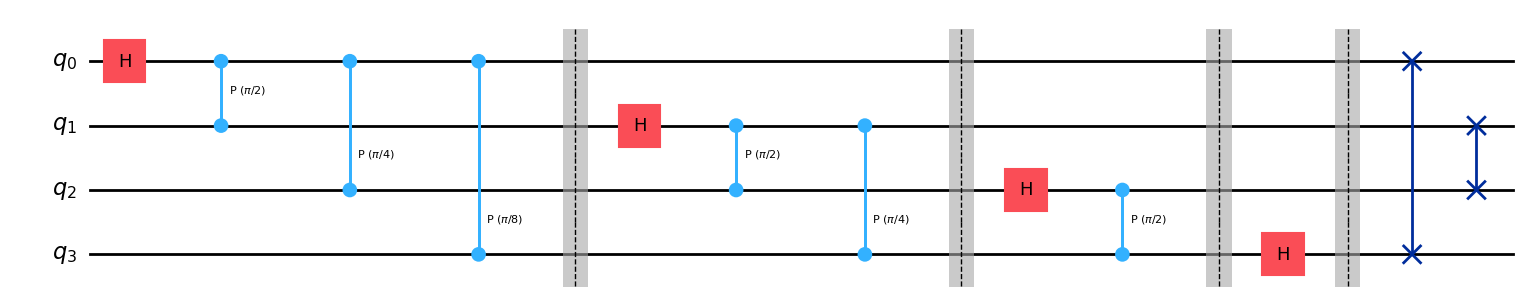

In [4]:
def QFT(n):
    qc = QuantumCircuit(n)
    for t in range(n):
        qc.h(t)
        for c in range(t+1, n):
            theta = np.pi/2**(c-t)
            qc.cp(theta, c, t)
        qc.barrier()

    for i in range(int(n/2)):
        qc.swap(i, n-1-i)
    
    return qc

QFT(4).draw('mpl')

In [5]:
def QFT_gate(n):
    qc = QuantumCircuit(n, name= "  QFT  ")
    for t in range(n):
        qc.h(t)
        for c in range(t+1, n):
            theta = np.pi/2**(c-t)
            qc.cp(theta, c, t)

    for i in range(int(n/2)):
        qc.swap(i, n-1-i)

    return qc.to_gate()


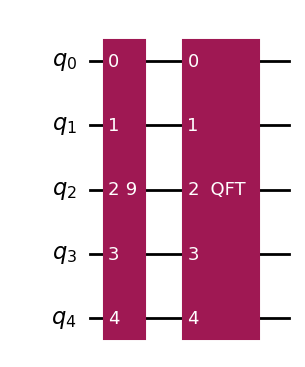

In [6]:
qc = QuantumCircuit(5)
qc.compose(fg.quantum_number_encode(9,5), inplace=True)
qc.compose(QFT_gate(5), inplace=True)
qc.draw('mpl')

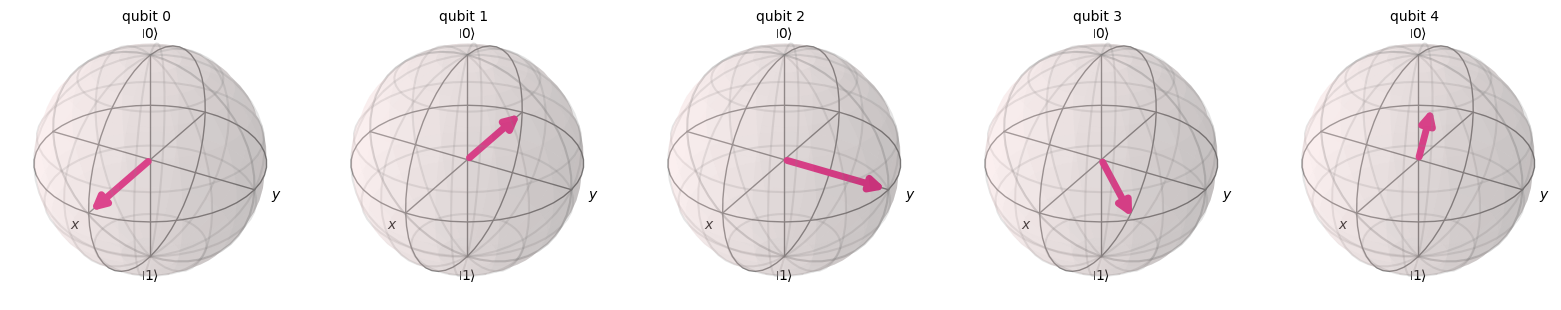

In [7]:
plot_bloch_multivector(qc)

In [8]:
def inverse_QFT_gate(n):
    qc = QFT_gate(n).inverse()
    qc.name = "  iQFT  "
    return qc

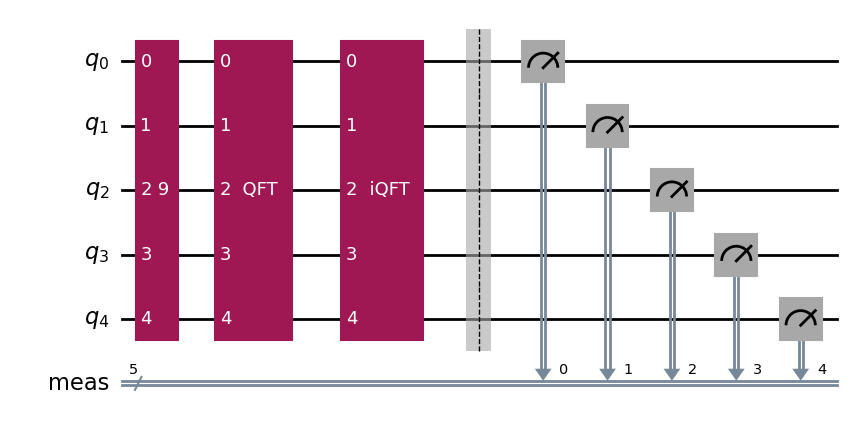

In [9]:
qc = QuantumCircuit(5)
qc.compose(fg.quantum_number_encode(9,5), inplace=True)
qc.compose(QFT_gate(5), inplace=True)
qc.compose(inverse_QFT_gate(5), inplace=True)

qc.measure_all()
qc.draw('mpl')
#plot_bloch_multivector(qc)

In [11]:
counts = fq.run(qc)
print(counts)

{'01001': 1024}


La complessità della QFT è $O(n^2)$.